In [2]:
# import libraries
import numpy as np
import pandas as pd

## 13.1  Bitly Data from 1.USA.gov

In [3]:
# import dataset
path = '/content/drive/MyDrive/Python for Data Analysis/DataSets/example.txt'

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [4]:
# python has built in function and third party libraries for converting JSON to Dictionary
import json

with open(path) as f:
    records=[json.loads(line) for line in f]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### couting the timezones in pure python

> suppose we were intrested in finding timezone that occurs most often in the dataset (tz field)

> there are many ways we can do. lets extract list of the timezones agains the list comprehension


In [6]:
time_zones=[rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [7]:
# here we can see the some empty string values. but we can fill those values

# next we going to counts the time_zones

# here we going to show you two ways

# 1. harder by using python library  2. simpler by using pandas

In [8]:
# harder way

def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]=counts[x]+1
        else:
            counts[x] = 1
    return counts

In [9]:
# using more advanced tools in python standard library, you can write them briefly

from collections import defaultdict

def get_counts2(sequence):
    counts=defaultdict(int) # value will be initialize 0
    for x in sequence:
        counts[x] += 1

    return counts

In [10]:
# to count the time_zone just pass it get_count function
counts=get_counts(time_zones)
counts['America/New_York']

1251

In [11]:
len(time_zones)

3440

In [12]:
# if we want top 10 time_zones and counts, by we can make list of tuples by (count, timezone) and sort it
def top_counts(count_dict,n=10):
    value_key_pairs=[(count,tz)for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [13]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [14]:
# if you search the python standard library , you may find the collections.Counter class, which makes this even simpler

from collections import Counter

counts=Counter(time_zones)

counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### counting timezones with pandas

> you can create a dataframe from orginal set of records by passing list of records to pandas.DataFrame

In [15]:
frame=pd.DataFrame(records)

# we can look same basic information about this new dataframe, a such column name, inferred columns, number of missing values
# -  using frame.info()

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [16]:
frame['tz'].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [17]:
# the output shown is frame summary view, shown for large dataframe objects, we can then use value_counts method for the series

tz_counts=frame['tz'].value_counts()

tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [18]:
# we can visualize the this data by using matplotlib

# we can fill the value in missing place

clean_tz=frame['tz'].fillna('Missing')

clean_tz[clean_tz=='']= 'Unknown'

tz_counts=clean_tz.value_counts()

clean_tz.head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

<Axes: >

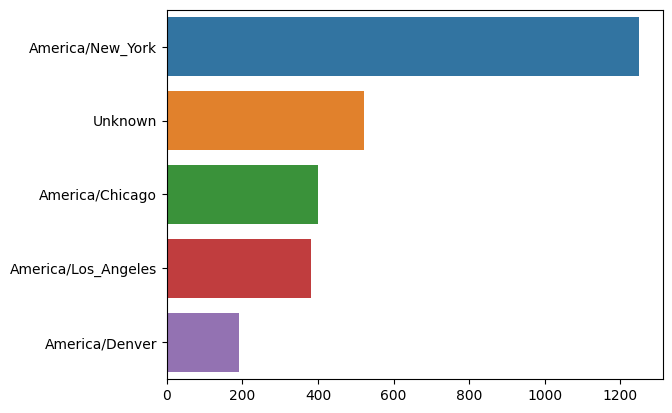

In [19]:
# we can use seaborn package to make a horizonal bar

import seaborn as sns

subset=tz_counts.head()

sns.barplot(y=subset.index,x=subset.to_numpy())

In [20]:
# a field contains the information about browser, device or application used to perform the URL

frame['a'][1]


'GoogleMaps/RochesterNY'

In [21]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [22]:
frame['a'][50][:50] # long line

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/2010'

In [23]:
# parsing the all intersting information in these the agent strings may seems like daunting task

# one possible strategy is split off the first token into strings  and make another summary of user behavior

In [24]:
results = pd.Series([x.split()[0] for x in frame['a'].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [25]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [26]:
# now suppose we want to decompose the the top timezones into windows and non_windows

# lets say the user is on windows if the string contains in 'Windows' is agent string

# since the some of agents are missing. we will exclude these from data

In [27]:
cframe=frame[frame['a'].notna()].copy()

In [28]:
# we want to compute the a value of whether the each row is windows
cframe['os']=np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

cframe['os'].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [29]:
# now we goruping the data by time_zone column and this list of operting systems

by_tz_os=cframe.groupby(['tz','os'])

In [30]:
# the group counts, the analogous the value_count function , can be computed with size.

# -the result is reshaped into table by using unstack

In [31]:
agg_counts=by_tz_os.size().unstack().fillna(0)

agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [32]:
# finally select the top overall time zones. to do so i construct the indirect index array from the row counts in agg_counts

# after computing the rows counts with agg_counts.sum('columns')

# and i call argsort() to optain an index array that can be sort in asecending order

In [33]:
indexer=agg_counts.sum('columns').argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

In [34]:
# i use take to select the rows in that order, then slice off the last 10 rows (largest values)
count_subset=agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [35]:
# pandas has convience method called nlargest that does same thing

agg_counts.sum(axis='columns').nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [36]:
# then this can be ploted by grouped bar plot comparing number of windows and non windows users

# using seaborn bar flot function

# i first call count_subset_.stack() and reset the index arrange the data for better compatability with seaborn



In [37]:
count_subset=count_subset.stack()

count_subset.name='total'

count_subset=count_subset.reset_index()

count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

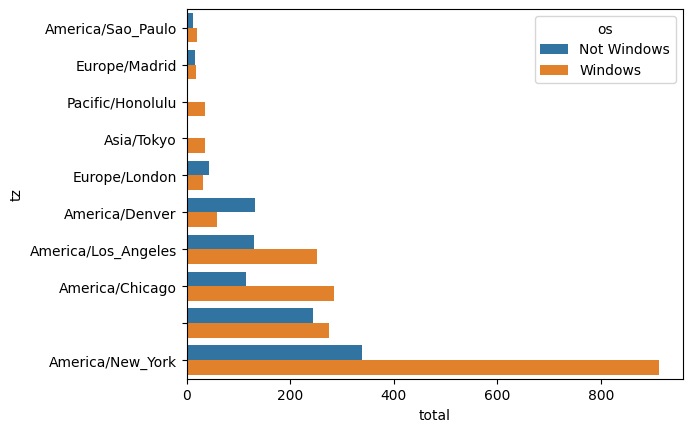

In [38]:
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

<ipython-input-39-84a87c34c2d9>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results= count_subset.groupby('tz').apply(norm_group)


<Axes: xlabel='normed_data', ylabel='tz'>

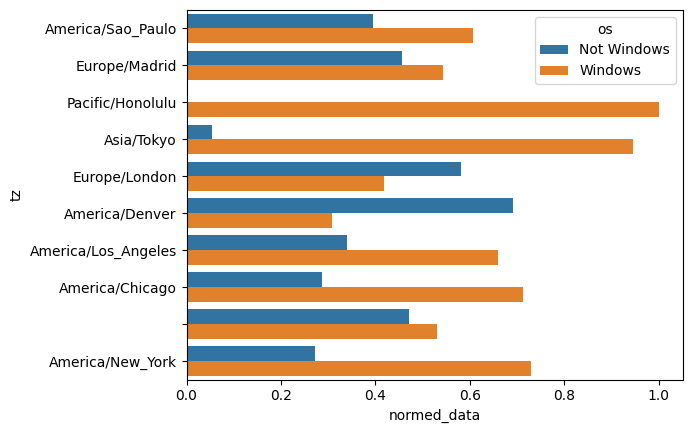

In [39]:
# its a bit difficult to understand see relative percentage of windows users in the smaller groups,

# so normalize the group percentage to sum of 1

def norm_group(group):
    group['normed_data']=group['total'] / group['total'].sum()
    return group

results= count_subset.groupby('tz').apply(norm_group)


sns.barplot(x='normed_data',y='tz',hue='os',data=results)

In [40]:
# we could have computed the normalized sum more efficiently by using the tranform method with groupby

g = count_subset.groupby('tz')

result2= count_subset['total'] / g['total'].transform('sum')

## 13.2 MovieLens 1M Dataset

In [41]:
# import dataset

unames=['user_id','gender','age','occupation','zip']
users = pd.read_table('/content/drive/MyDrive/Python for Data Analysis/DataSets/MovieLens 1M Dataset/users.dat',
                      sep='::',header=None,names=unames,engine='python')

rnames=['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('/content/drive/MyDrive/Python for Data Analysis/DataSets/MovieLens 1M Dataset/ratings.dat',
                      sep='::',header=None,names=rnames,engine='python')

mnames=['movie_id','title','genres']
movies=pd.read_table('/content/drive/MyDrive/Python for Data Analysis/DataSets/MovieLens 1M Dataset/movies.dat',
                     sep='::',header=None,names=mnames,engine='python')

In [42]:
# checking everything is works fine
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [43]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [44]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [46]:
# analyzing the data with mulitple tables not at simple. so we joining the dataet with pandas merge function

data = pd.merge(pd.merge(users,ratings),movies)

In [47]:
data

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [48]:
# index locating 0

data.iloc[0]

user_id                                            1
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
movie_id                                        1193
rating                                             5
timestamp                                  978300760
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [49]:
# to get movie ratings each film grouped by gender, we can use pivot table method

mean_ratings=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')

In [50]:
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [51]:
# now am going to filter the movies that received at least 250 ratings.

# to do this i can use group the data by title and size() series of group sizes of the each title

ratings_by_title=data.groupby('title').size()

ratings_by_title.head(5)

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [52]:
active_titles = ratings_by_title.index[ratings_by_title>=250]


In [53]:
# the index of title receiving atleast 250 movie ratings can be used to select the rows from
# -  mean rating by using .loc


mean_ratings = mean_ratings.loc[active_titles]

mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [54]:
# to see the top films among female viewers, we can sort by the F column in descending order

top_female_ratings = mean_ratings.sort_values('F',ascending=False)

top_female_ratings.head(5)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### measuring rating disaggrement

In [55]:
# suppose we want to find out movies that are most divisive between male and female viewers.

# one way is adding column to mean_ratings containing the diffrence in means, then sort by that


mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F']

mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


In [56]:
sorted_by_diff = mean_ratings.sort_values('diff',ascending=True)

sorted_by_diff.head(5)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [57]:
# reversing the rows and selecting by the top 10, we get the movies preffred by men that woman did't rate as highly

sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [58]:
# suppose the instead of movies that elicited the most disaggrement among viewers, independent of gender identification

# disaggrement can be measured by the standard deviation of the ratings




In [59]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [60]:
# to get this, first compute the rating standard deviation by titles and sort by the active_titles

rating_std_by_title = rating_std_by_title.loc[active_titles]

In [61]:
rating_std_by_title.head(5)

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [62]:
# then we sort the descending order and select the top 10 first rows

rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [63]:
# a single movie belongs to multiple genres, to help us group by genre, we can use explode method on dataframe.

# first we can split the genre into lists series by using str.split()

In [64]:
movies['genres'].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [65]:
movies['genres'].head().str.split('|')

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [66]:
movies['genre'] = movies.pop('genres').str.split('|')

In [67]:
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [68]:
# now we are calling the movies.explode('genre') generates new dataframe with one row in each inner elements in each list genre

movies_exploded=movies.explode('genre')

In [69]:
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [70]:
# now we can group by all three tables by using genre

ratings_with_genre=pd.merge(pd.merge(movies_exploded,ratings),users)

In [71]:
genre_ratings = (ratings_with_genre.groupby(['genre','age'])['rating'].mean().unstack('age'))

In [72]:
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


In [73]:
array=np.arange(5)